### Exercício 01

![alt text](ex1.png)

![alt text](fluxograma1.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

# Classe que representa a cadeia atômica
class CadeiaAtomica:
    def __init__(self, N: int, tipo: str = 'homogenea', k: float = 1.0):
        self.N = N               # Número de átomos na cadeia
        self.k = k               # Constante elástica das molas
        self.tipo = tipo.lower()  # Tipo da cadeia ('homogenea' ou 'ternaria')
        self.massas = self._gerar_massas()  # Vetor com as massas dos átomos

    def _gerar_massas(self):
        m = 1.0  # Massa base
        if self.tipo == 'homogenea':
            return np.full(self.N, m)
        elif self.tipo == 'ternaria':
            # Alternância m, 3m, 5m, m, 3m, 5m, ...
            pattern = [m, 3*m, 5*m]
            return np.array([pattern[i % 3] for i in range(self.N)])

    def montar_matrizes(self):
        # Matriz de massa (diagonal)
        M = np.diag(self.massas)
        K = np.zeros((self.N, self.N))

        # Matriz de rigidez K com condições de contorno com pontas livres (as extremidades da cadeia não estão presas).
        for i in range(self.N):
            if i > 0:
                K[i, i - 1] = -self.k
            if i < self.N - 1:
                K[i, i + 1] = -self.k
            K[i, i] = (K[i] != 0).sum() * self.k

        return M, K

    def calcular_frequencias_e_modos(self):
        M, K = self.montar_matrizes()

        # Calcula a matriz dinâmica D = M^(-1/2) K M^(-1/2)
        M_sqrt_inv = np.diag(1 / np.diag(M))  # M^(-1/2)
        D = M_sqrt_inv @ K @ M_sqrt_inv

        # Calcula autovalores e autovetores da matriz dinâmica
        eigvals, eigvecs = eig(D)

        # Apenas parte real dos autovalores
        eigvals = np.real(eigvals)

        # Remove valores negativos e ordena
        eigvals = np.clip(eigvals, 0, None) 
        freq = eigvals  # Frequências naturais

        # Ordena frequências e modos
        idx = np.argsort(freq)
        freq = freq[idx]
        eigvecs = eigvecs[:, idx]

        return freq, eigvecs

In [2]:
Ns = [100, 1000, 10000]
tipos = ['homogenea', 'ternaria']

for N in Ns:
    for tipo in tipos:
        print(f"\n===== N = {N}, Tipo = {tipo} =====")
        sistema = CadeiaAtomica(N=N, tipo=tipo, k=1.0)
        freq, modos = sistema.calcular_frequencias_e_modos()
        print("Primeiras 10 frequências (ω²):", freq[:10])

        print("\n--- 5 primeiros autovetores (primeiros 10 elementos) ---")
        for i in range(5):
            print(f"Modo {i+1} (ω² = {freq[i]:.6f}):")
            print(modos[:5, i])  # Apenas os 5 primeiros elementos do autovetor

        print("\n--- 5 últimos autovetores (primeiros 10 elementos) ---")
        for i in range(5):
            idx = -5 + i
            modo_num = N - 5 + i + 1
            print(f"Modo {modo_num} (ω² = {freq[idx]:.6f}):")
            print(modos[:5, idx])


===== N = 100, Tipo = homogenea =====
Primeiras 10 frequências (ω²): [6.43273187e-16 9.86879269e-04 3.94654314e-03 8.87607079e-03
 1.57705974e-02 2.46233188e-02 3.54254985e-02 4.81664761e-02
 6.28336777e-02 7.94126286e-02]

--- 5 primeiros autovetores (primeiros 10 elementos) ---
Modo 1 (ω² = 0.000000):
[-0.1 -0.1 -0.1 -0.1 -0.1]
Modo 2 (ω² = 0.000987):
[-0.14140391 -0.14126436 -0.1409854  -0.14056731 -0.14001049]
Modo 3 (ω² = 0.003947):
[-0.14135157 -0.14079372 -0.13968022 -0.13801547 -0.13580604]
Modo 4 (ω² = 0.008876):
[0.14126436 0.14001049 0.13751387 0.13379667 0.12889189]
Modo 5 (ω² = 0.015771):
[-0.14114229 -0.1389164  -0.1344997  -0.12796187 -0.119406  ]

--- 5 últimos autovetores (primeiros 10 elementos) ---
Modo 96 (ω² = 3.975377):
[-0.01109579  0.03301416 -0.05411961  0.07389246 -0.09184582]
Modo 97 (ω² = 3.984229):
[ 0.00887992 -0.02649972  0.0437016  -0.06021428  0.07577735]
Modo 98 (ω² = 3.991124):
[-0.00666186  0.01992644 -0.03301416  0.04580884 -0.05819692]
Modo 99 (ω²

### Exercício 02
![alt text](ex2.png)

![alt text](fluxograma2.png)


--- Comparando densidade de estados para N = 100 ---


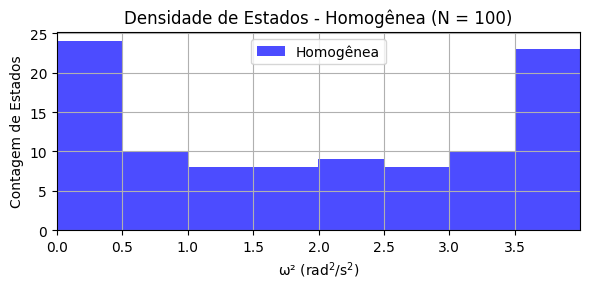

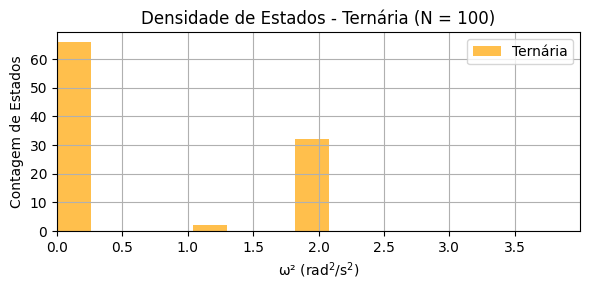


--- Comparando densidade de estados para N = 1000 ---


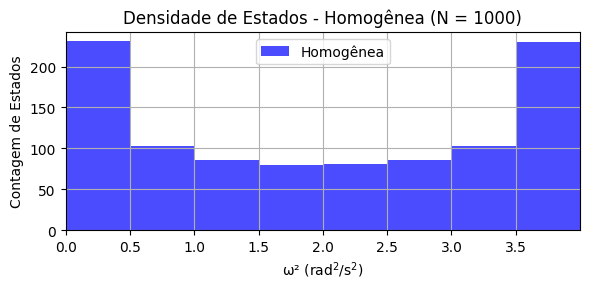

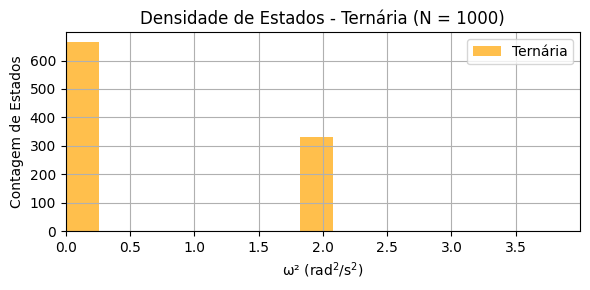


--- Comparando densidade de estados para N = 10000 ---


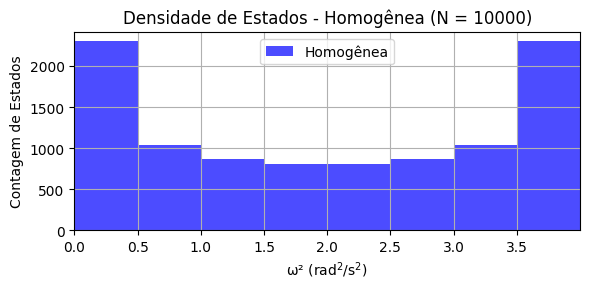

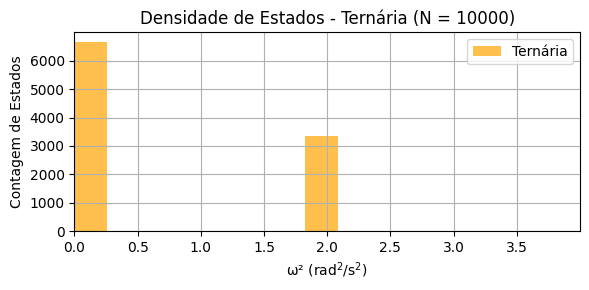

In [3]:
def plotar_densidade_de_estados(freq_hom, freq_tern, N, bins):
    # Determinar os limites do histograma
    freq_min = min(np.min(freq_hom), np.min(freq_tern))
    freq_max = max(np.max(freq_hom), np.max(freq_tern))

    # Frequências homogêneas
    plt.figure(figsize=(6, 3))
    plt.hist(freq_hom, bins=bins, color='blue', alpha=0.7, label='Homogênea')
    plt.xlim(freq_min, freq_max)
    plt.title(f"Densidade de Estados - Homogênea (N = {N})")
    plt.xlabel("ω² (rad$^2$/s$^2$)")
    plt.ylabel("Contagem de Estados")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Frequências ternárias
    plt.figure(figsize=(6, 3))
    plt.hist(freq_tern, bins=bins, color='orange', alpha=0.7, label='Ternária')
    plt.xlim(freq_min, freq_max)
    plt.title(f"Densidade de Estados - Ternária (N = {N})")
    plt.xlabel("ω² (rad$^2$/s$^2$)")
    plt.ylabel("Contagem de Estados")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Laço principal para gerar os histogramas para N = 100, 1000
Ns = [100, 1000, 10000]
for N in Ns:
    print(f"\n--- Comparando densidade de estados para N = {N} ---")
    sistema_hom = CadeiaAtomica(N=N, tipo='homogenea')
    freq_hom, _ = sistema_hom.calcular_frequencias_e_modos()

    sistema_tern = CadeiaAtomica(N=N, tipo='ternaria')
    freq_tern, _ = sistema_tern.calcular_frequencias_e_modos()

    plotar_densidade_de_estados(freq_hom, freq_tern, N, 8)

### Exercício 03
![alt text](ex3.png)

![alt text](fluxograma3.png)


===== N = 100 =====


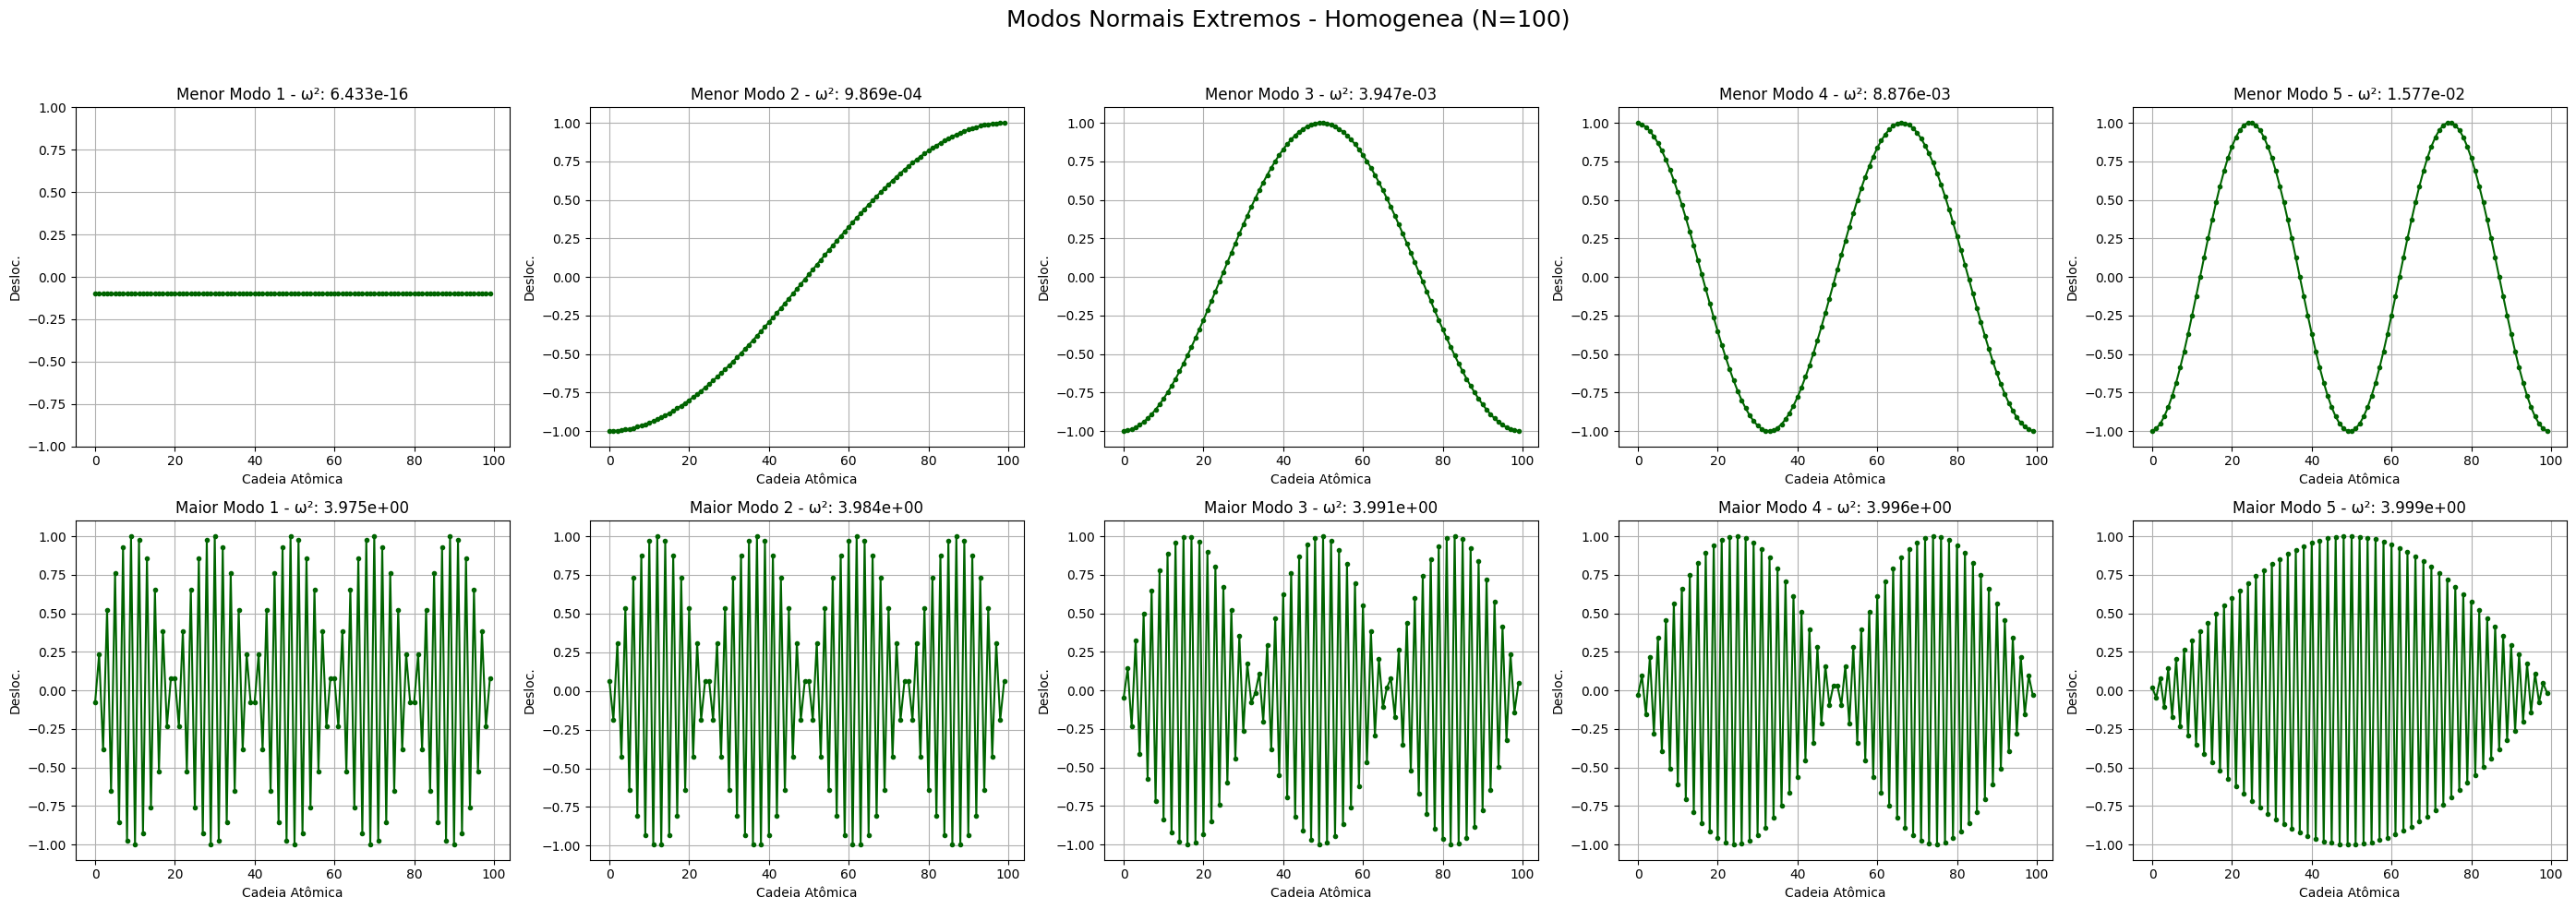

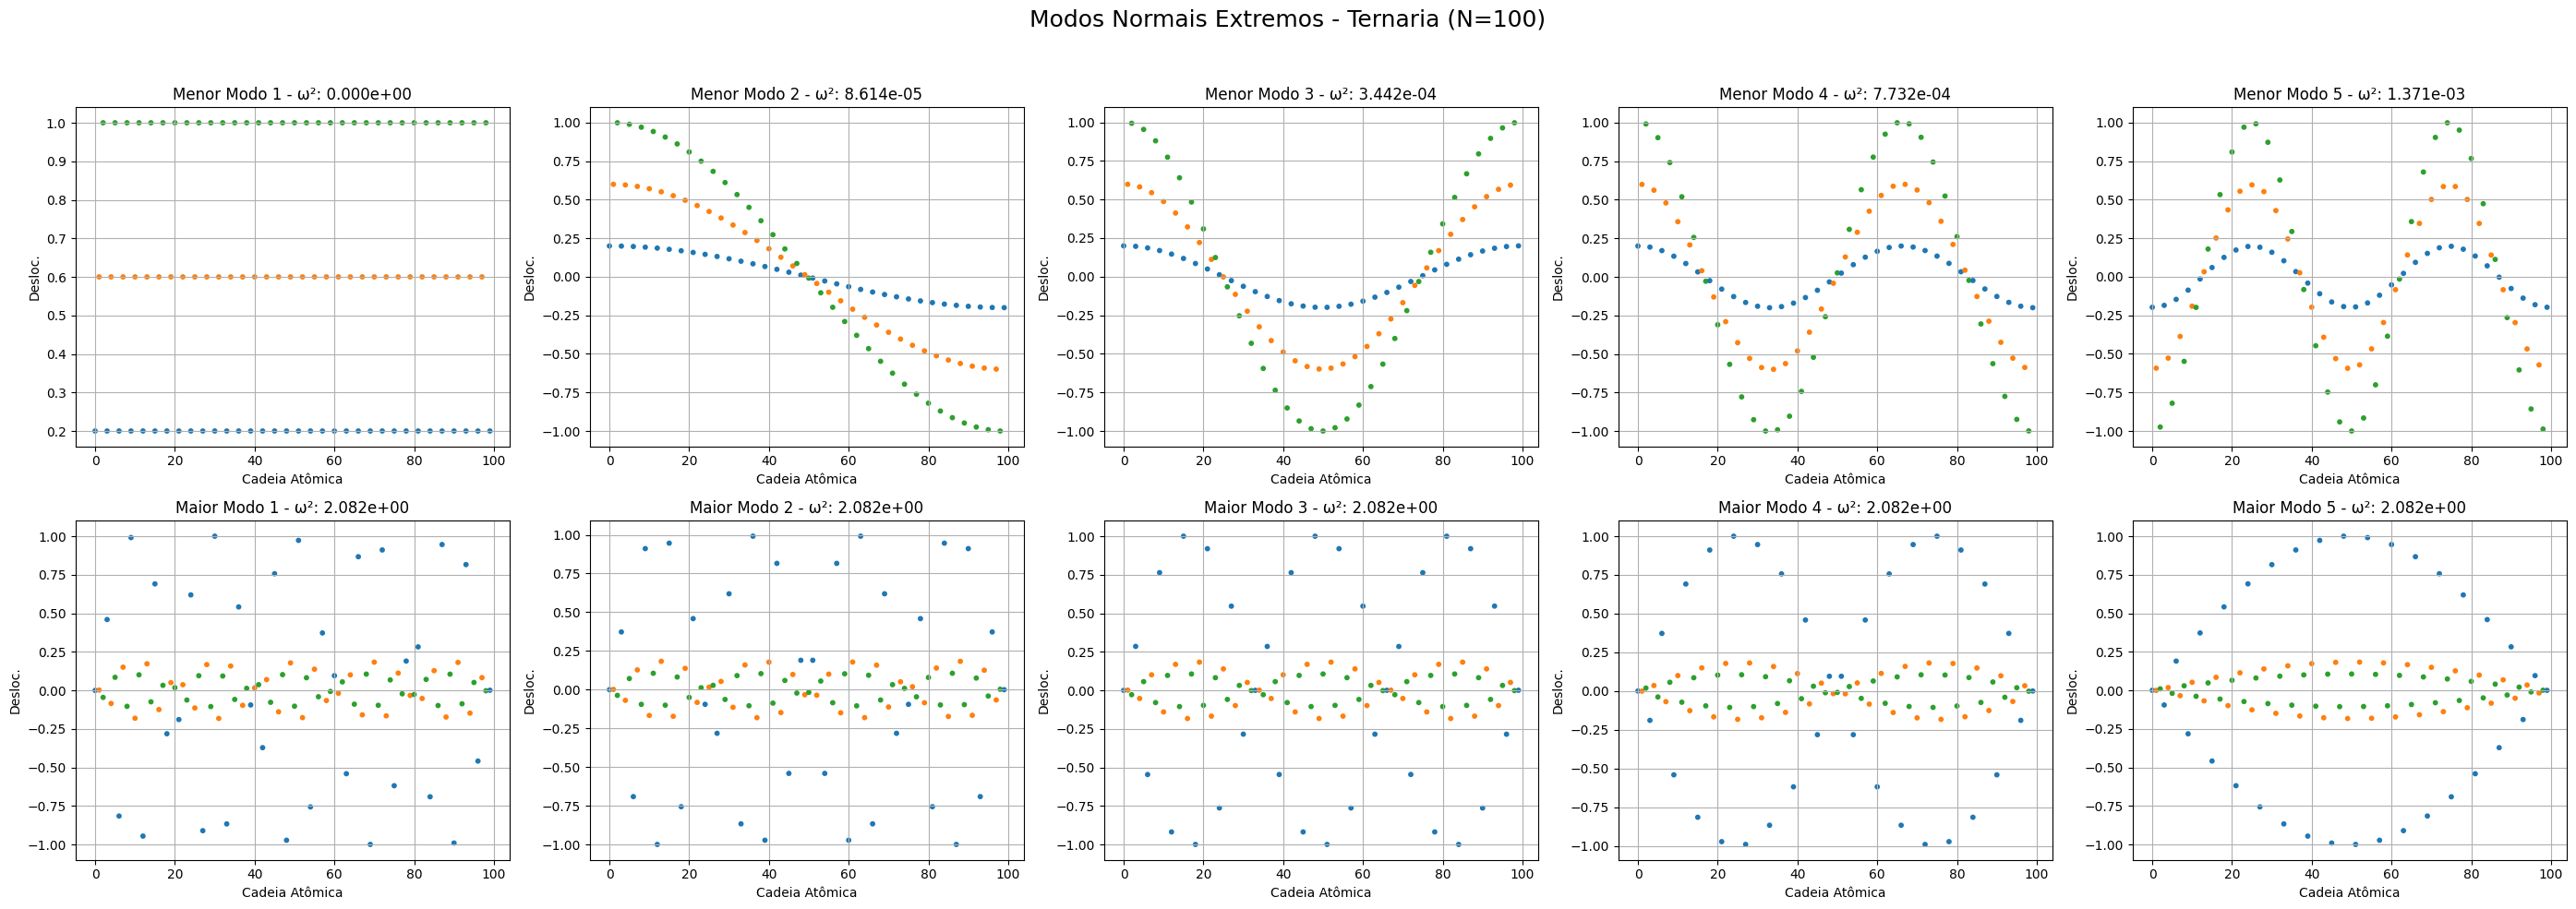


===== N = 1000 =====


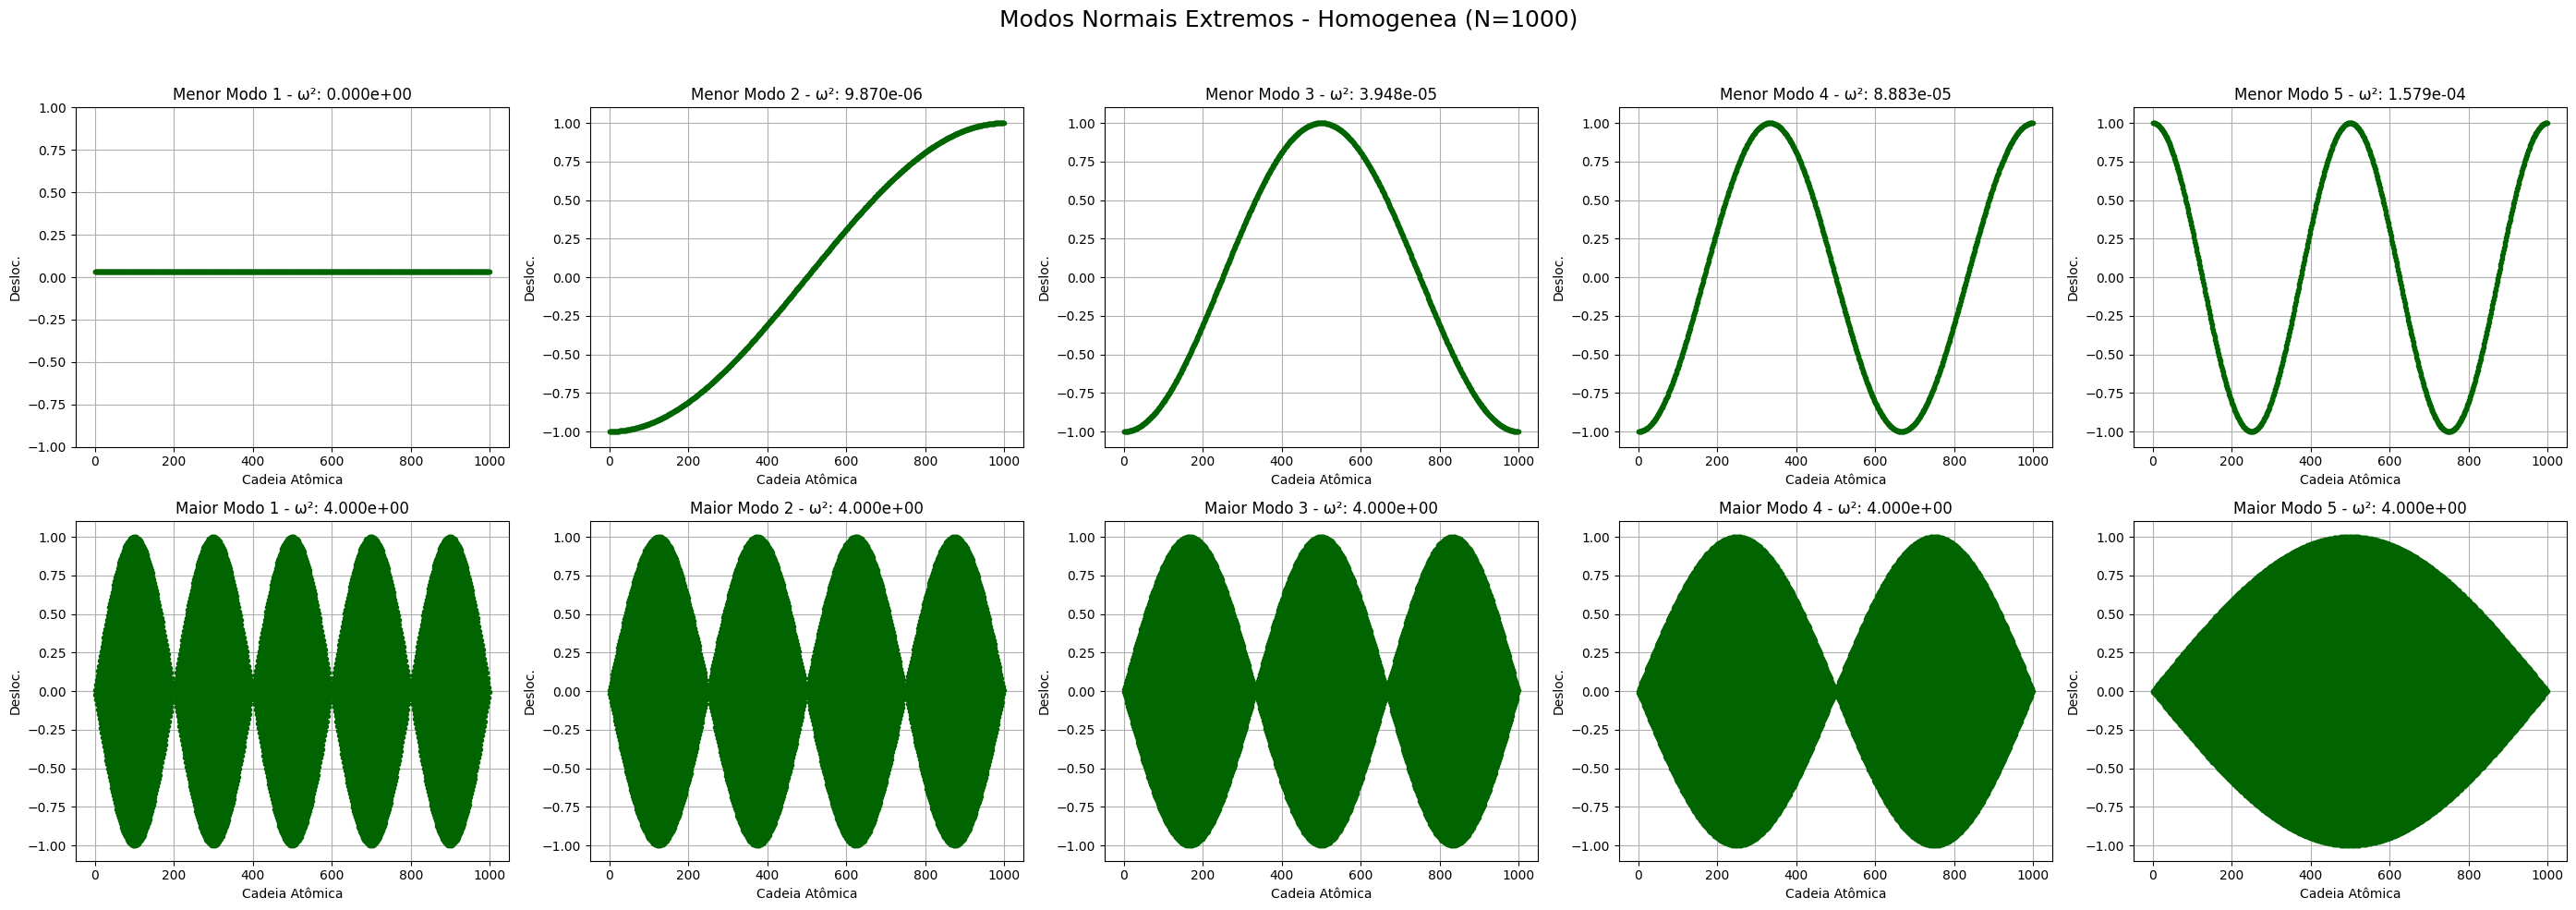

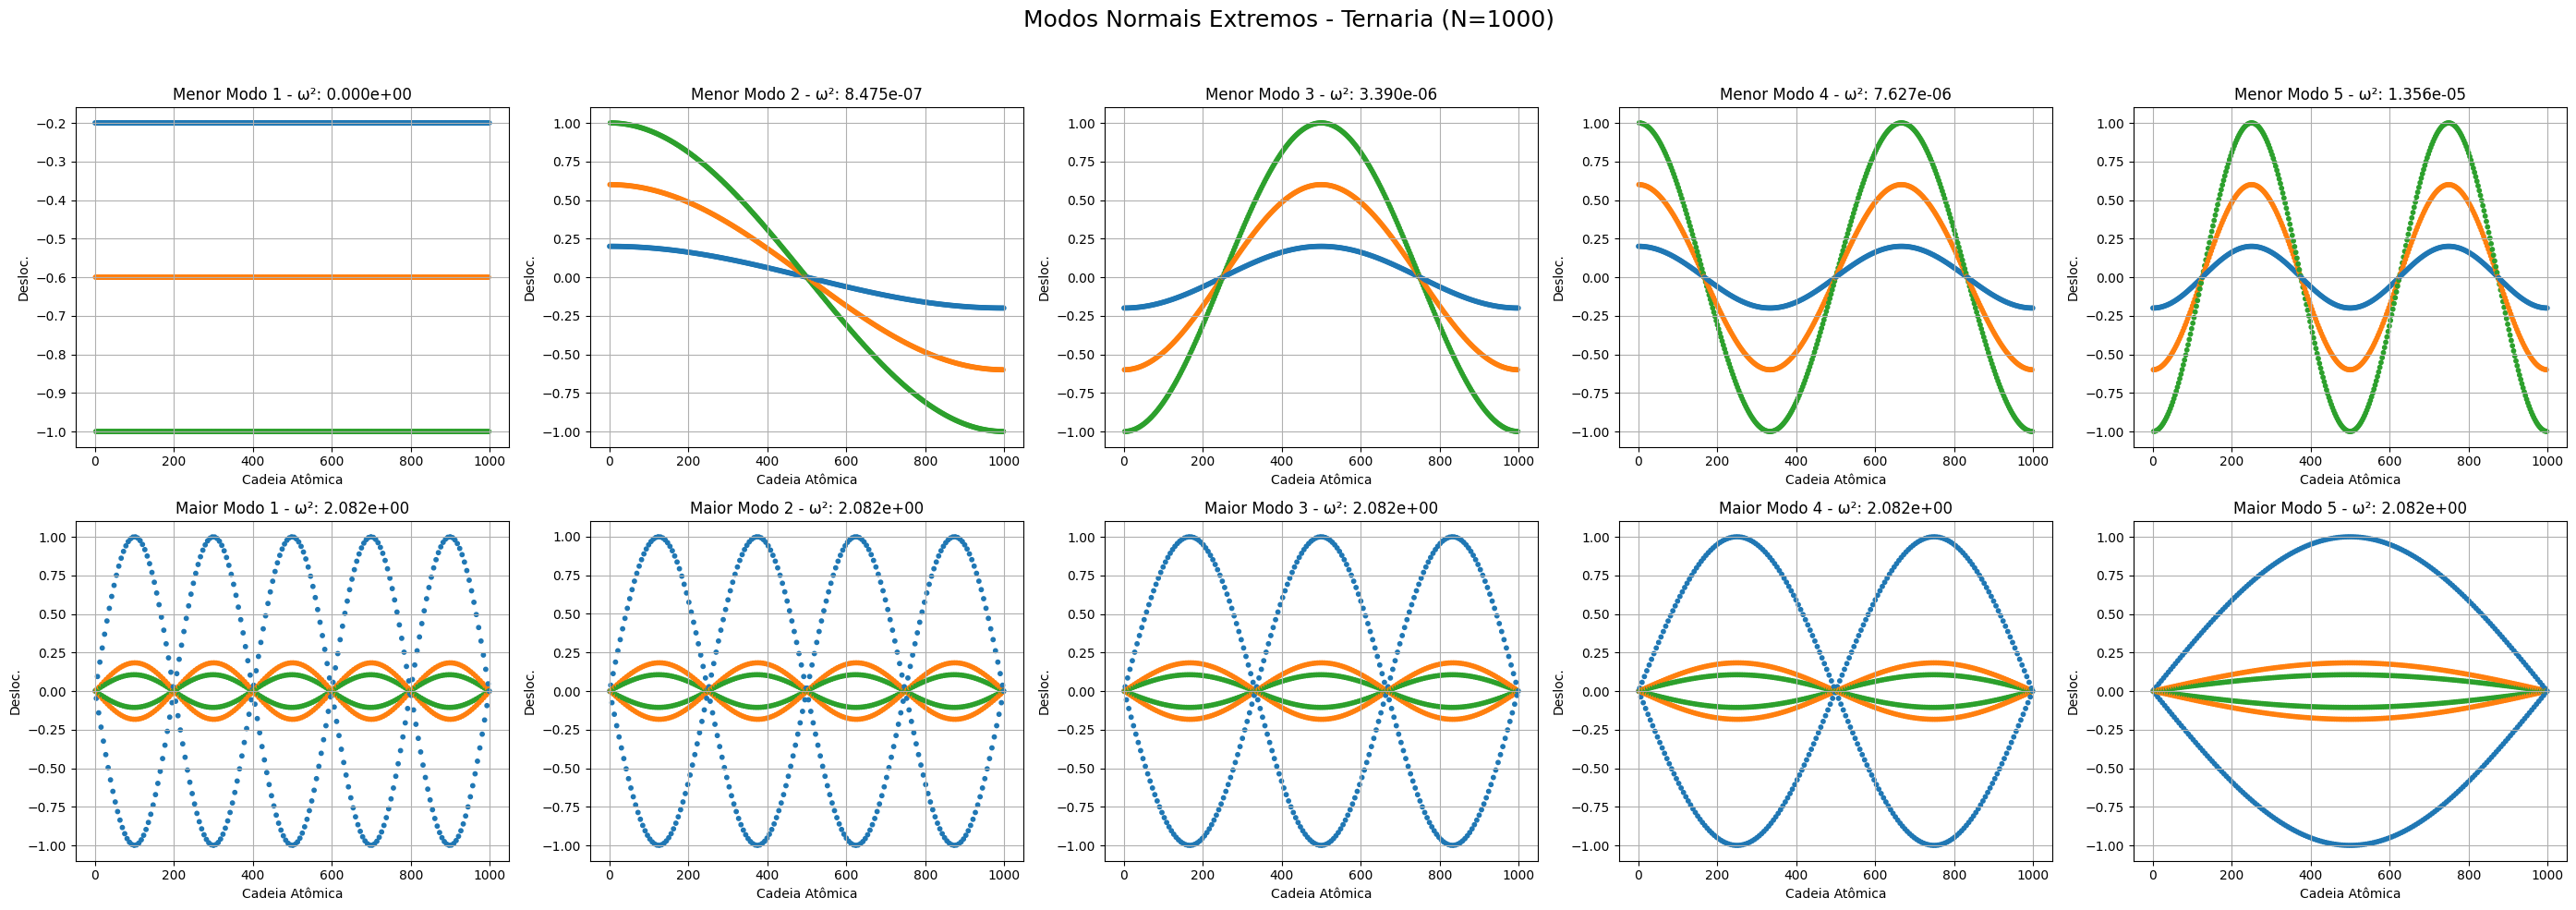


===== N = 10000 =====


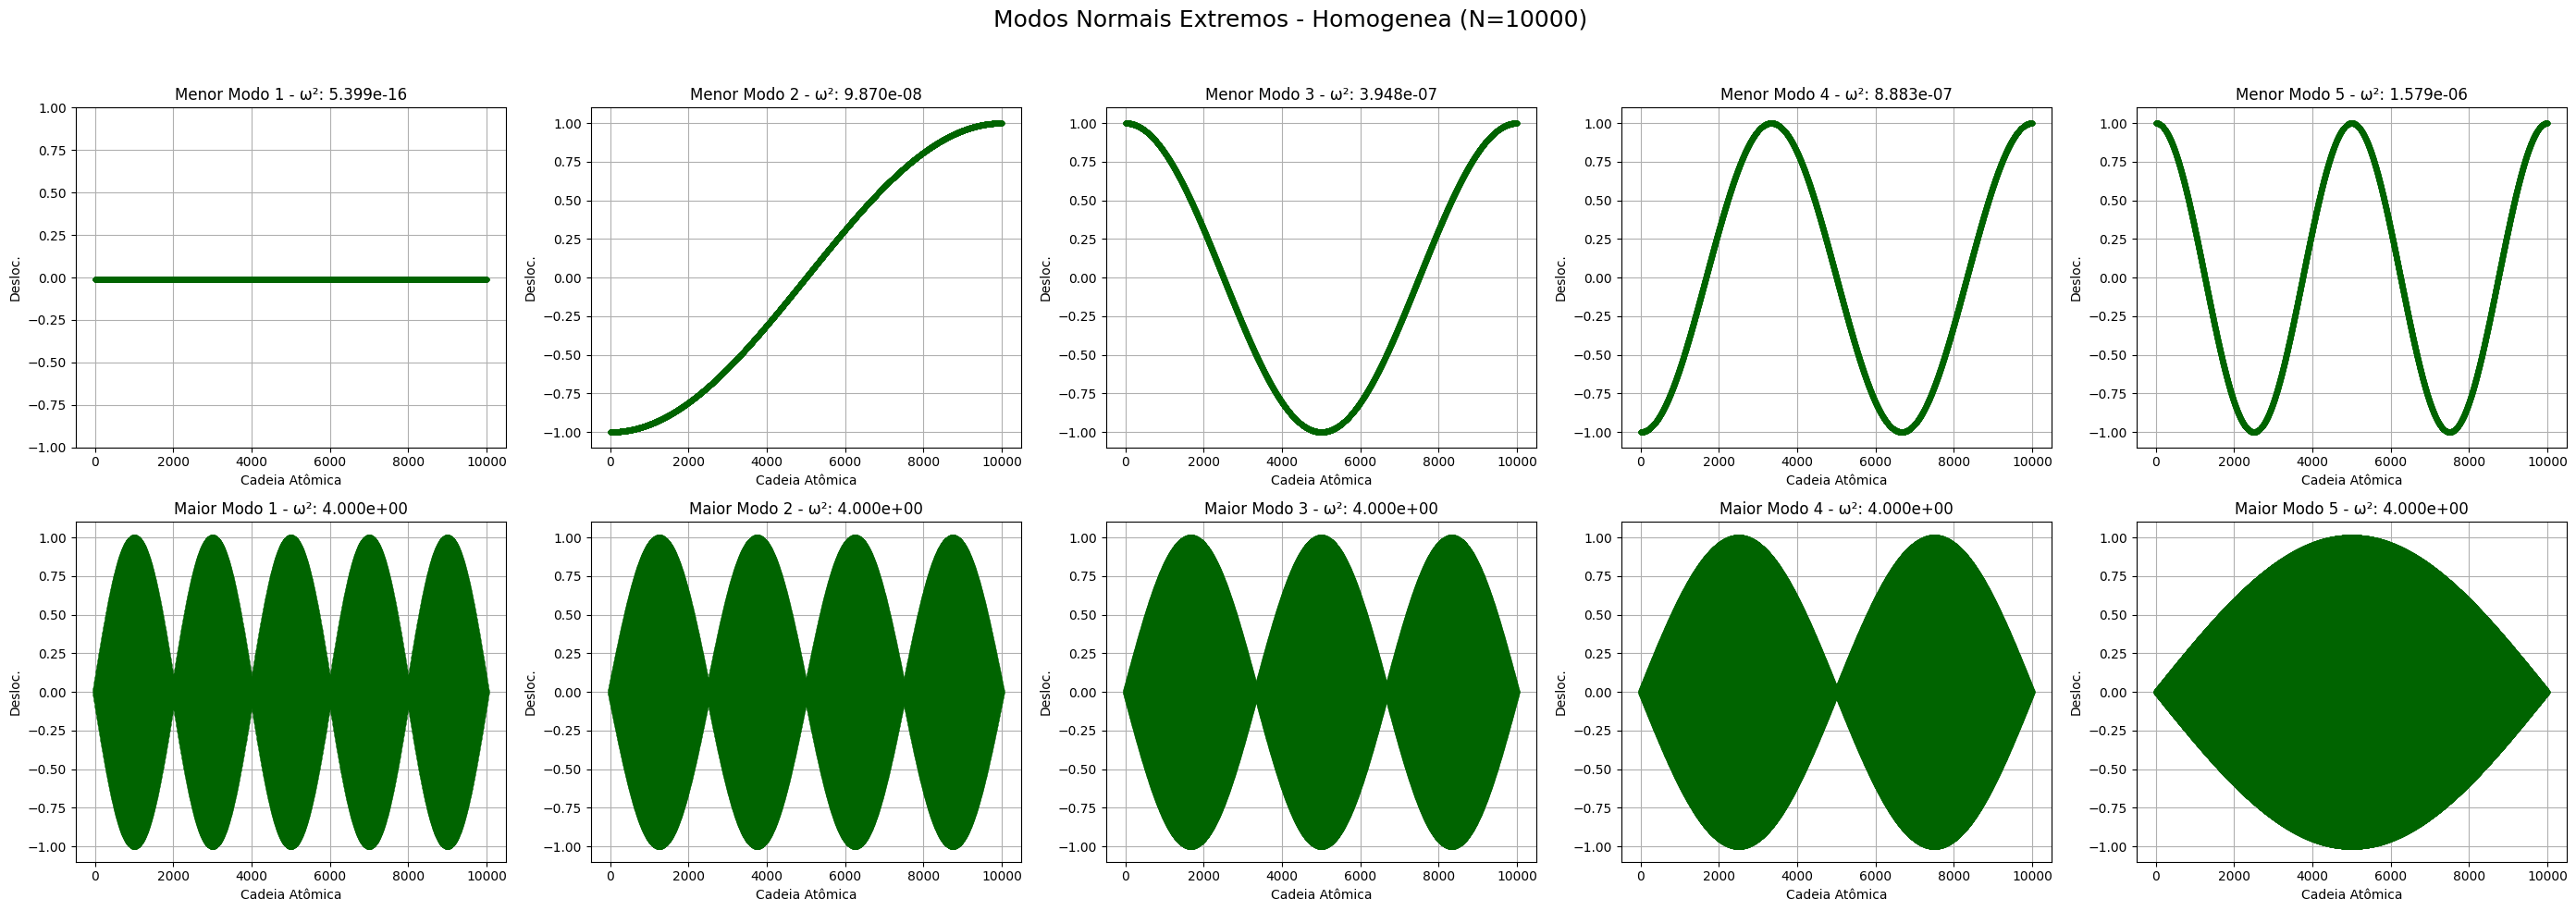

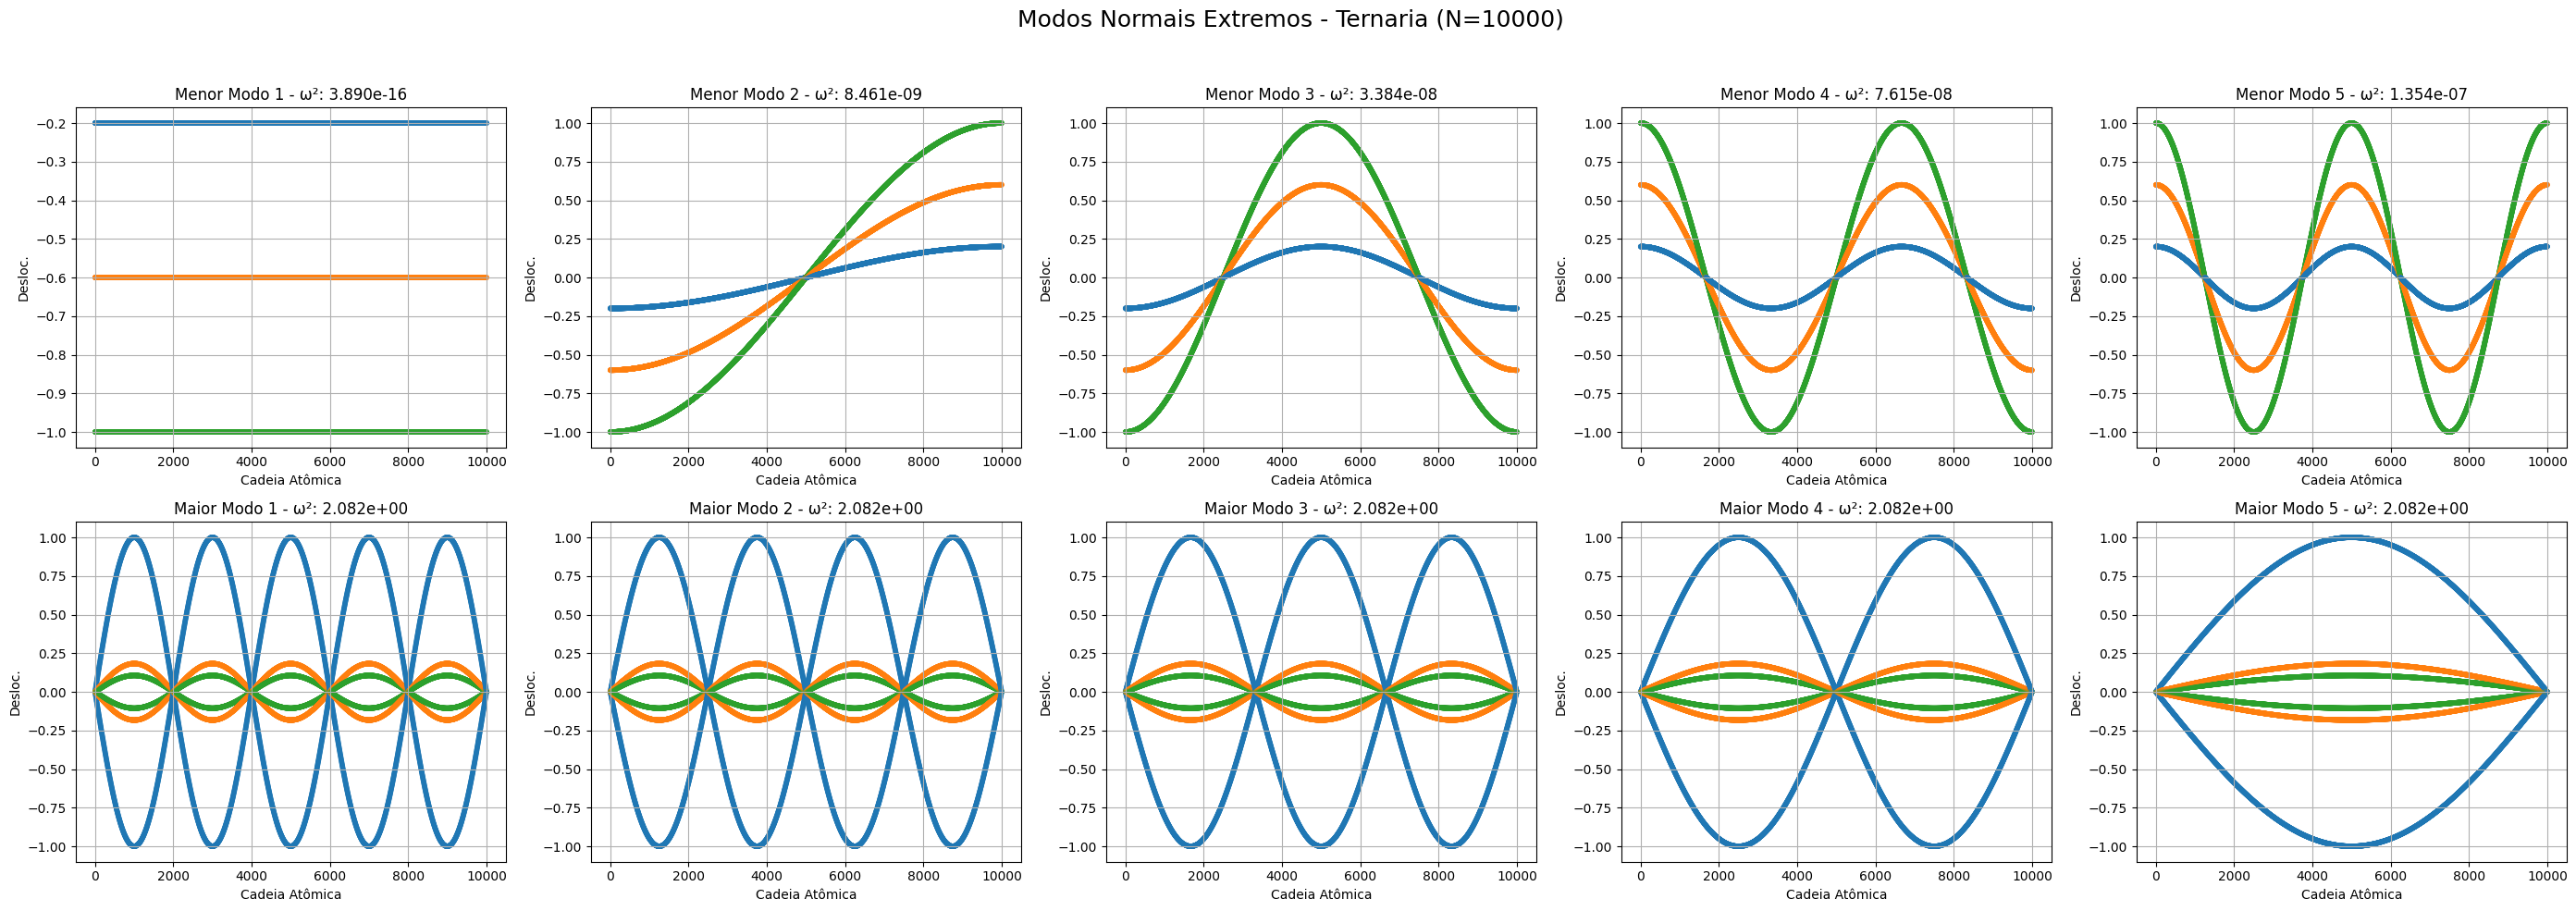

In [4]:
def plotar_modos_extremos(modos, freq, N, tipo, n_modos=5, massas=None):
    fig, axs = plt.subplots(2, 5, figsize=(28, 10)) 
    
    # Índices das 5 menores e 5 maiores frequências
    indices_menores = np.argsort(freq)[:n_modos]
    indices_maiores = np.argsort(freq)[-n_modos:]

    # Definir cores (somente se for cadeia ternária)
    cores = None
    if tipo == 'ternaria' and massas is not None:
        unique_massas = np.unique(massas)
        cores = {massa: plt.cm.tab10(i) for i, massa in enumerate(unique_massas)}

    # Plot dos modos de menor frequência
    for i, idx in enumerate(indices_menores):
        desloc = modos[:, idx]

        if not (tipo == 'homogenea' and i == 0):
            desloc /= np.max(np.abs(desloc))

        ax = axs[0, i]
        x = np.arange(len(desloc))
        if cores:
            cor_lista = [cores[massas[j]] for j in range(len(desloc))]
            ax.scatter(x, desloc, c=cor_lista, s=10)
        else:
            ax.plot(x, desloc, '-o', color='darkgreen', markersize=3)

        ax.set_title(f"Menor Modo {i+1} - ω²: {freq[idx]:.3e}")
        ax.set_xlabel("Cadeia Atômica")
        ax.set_ylabel("Desloc.")
        ax.grid(True)

        if tipo == 'homogenea' and i == 0:
            ax.set_ylim(-1, 1)
            ax.ticklabel_format(style='plain', axis='y')  # desativa notação científica só aqui

    # Plot dos modos de maior frequência
    for i, idx in enumerate(indices_maiores):
        desloc = modos[:, idx]
        desloc /= np.max(np.abs(desloc))  # normaliza sempre

        ax = axs[1, i]
        x = np.arange(len(desloc))
        if cores:
            cor_lista = [cores[massas[j]] for j in range(len(desloc))]
            ax.scatter(x, desloc, c=cor_lista, s=10)
        else:
            ax.plot(x, desloc, '-o', color='darkgreen', markersize=3)

        ax.set_title(f"Maior Modo {i+1} - ω²: {freq[idx]:.3e}")
        ax.set_xlabel("Cadeia Atômica")
        ax.set_ylabel("Desloc.")
        ax.grid(True)

    plt.suptitle(f"Modos Normais Extremos - {tipo.capitalize()} (N={N})", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Execução para os Ns desejados
Ns = [100, 1000,10000]

for N in Ns:
    print(f"\n===== N = {N} =====")

    # Homogênea
    sistema_hom = CadeiaAtomica(N=N, tipo='homogenea')
    freq_hom, modos_hom = sistema_hom.calcular_frequencias_e_modos()
    plotar_modos_extremos(modos_hom, freq_hom, N, tipo='homogenea')

    # Ternária
    sistema_tern = CadeiaAtomica(N=N, tipo='ternaria')
    freq_tern, modos_tern = sistema_tern.calcular_frequencias_e_modos()
    massas_tern = sistema_tern.massas  
    plotar_modos_extremos(modos_tern, freq_tern, N, tipo='ternaria', massas=massas_tern)

### Exercício 04
![alt text](ex4.png)

## Análise e Comparação

> #### Distribuição das Frequências (Densidade de Estados)

**Cadeia Homogênea:**

* Apresenta uma distribuição de frequências contínua e suave.
* A forma da curva de densidade de estados é típica de sistemas com simetria translacional uniforme.
* As frequências estão densamente distribuídas dentro de uma única banda contínua.

**Cadeia Ternária:**

* A distribuição das frequências apresenta **lacunas (band gaps)** visíveis entre grupos de frequências.
* Essas bandas surgem devido à alternância de massas, que quebra a simetria simples do sistema.
* A densidade de estados é composta por múltiplas faixas separadas, o que caracteriza o surgimento de zonas proibidas de vibração.

**Conclusão:**
A alternância de massas na cadeia ternária introduz **band gaps** na densidade de estados — algo que **não ocorre** na cadeia homogênea. Esse comportamento é análogo à formação de bandas proibidas em sólidos cristalinos com múltiplos átomos por célula unitária.


> #### Padrões de Deslocamento dos Modos Normais

**Modos de Baixa Frequência (baixa energia):**

* Em ambas as cadeias, os modos de baixa frequência apresentam **movimentos coletivos suaves**, com muitos átomos vibrando aproximadamente em fase.
* Esses modos correspondem a ondas acústicas, com perfis harmônicos de baixa curvatura.

**Modos de Alta Frequência (alta energia):**

* Na **cadeia homogênea**, os modos de alta frequência continuam a ser globalmente distribuídos, com alternância de fases ao longo da cadeia.
* Na **cadeia ternária**, observa-se **localização vibracional**: alguns átomos (especialmente os mais leves) vibram com maior amplitude, enquanto outros permanecem quase estáticos.

**Localização dos Modos:**

* A heterogeneidade de massas na cadeia ternária introduz regiões de inércia contrastante, que **impedem a propagação uniforme** da vibração.
* Os modos de alta frequência tendem a se **localizar nas massas menores**, com a energia confinada em domínios específicos da cadeia.

**Conclusão:**
A cadeia homogênea exibe **modos distribuídos de forma contínua**, enquanto a cadeia ternária mostra **localização vibracional marcante** nos modos de alta energia, causada pelas diferenças de massa entre os átomos $m,\, 3m,\, 5m$.

> #### Lacunas de Frequência (Band Gaps)

**Cadeia Homogênea:**

* Não há lacunas. As frequências formam uma faixa contínua desde zero até uma frequência máxima.

**Cadeia Ternária:**

* Apresenta **lacunas claras** (band gaps) entre grupos de frequências permitidas.
* Essas bandas proibidas surgem diretamente da **estrutura periódica com múltiplas massas**, um análogo direto dos gaps eletrônicos em cristais.

**Conclusão:**
A cadeia ternária possui **band gaps bem definidos**, que se tornam mais proeminentes à medida que o número de átomos $N$ aumenta. Essa estrutura tem relevância em materiais fonônicos, cristais fotônicos e engenharia de metamateriais.

> #### Observações sobre os Gráficos dos Modos

* Os **subplots separados por tipo de cadeia e por faixa de frequência** (modos mais baixos e mais altos) permitem uma análise clara dos padrões de vibração.
* Nos **modos de baixa frequência**, os gráficos mostram **formas de onda suaves** em ambas as cadeias, reforçando o caráter coletivo da vibração.
* Já nos **modos de alta frequência**, a diferença entre os tipos é evidente:

  * Na cadeia homogênea: há uma **alternância global** de fases ao longo da cadeia.
  * Na cadeia ternária: aparecem **picos localizados**, indicando **modos vibracionais confinados** espacialmente.

Essa diferenciação visual reforça as conclusões sobre **localização e complexidade estrutural**, proporcionando uma evidência gráfica dos efeitos da heterogeneidade de massas.

#### Resumo Comparativo

| Característica               | Cadeia Homogênea             | Cadeia Ternária                     |
| ---------------------------- | ---------------------------- | ----------------------------------- |
| Distribuição das Frequências | Contínua e suave             | Em bandas, com lacunas (band gaps)  |
| Modos de Baixa Frequência    | Ondas coletivas suaves       | Ondas com perturbações leves |
| Modos de Alta Frequência     | Oscilações rápidas contínuas | Modos localizados por inércia   |
| Lacunas de Frequência        | Não existem                  | Sim, existem lacunas visíveis       |
| Localização Vibracional      | Pouco ou nenhum              | Presente nos modos de alta energia  |